# Implementasi Principal Component Analysis (PCA) dan Multi Dimensional Scaling (MDS)
## Dataset Iris

### 1. Mengunduh dan Memuat Dataset Iris

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Memuat dataset Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Membuat DataFrame untuk visualisasi data
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['target_names'] = df['target'].apply(lambda x: target_names[x])

# Menampilkan 5 data pertama
print("Dimensi dataset:", X.shape)
print("\nNama fitur:", feature_names)
print("\nNama kelas:", target_names)
print("\n5 data pertama:")
df.head()

Dimensi dataset: (150, 4)

Nama fitur: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Nama kelas: ['setosa' 'versicolor' 'virginica']

5 data pertama:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### 2. Preprocessing Data

In [2]:
# Melakukan standardisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menampilkan statistik data sebelum dan sesudah standardisasi
print("Statistik sebelum standardisasi:")
print(pd.DataFrame(X, columns=feature_names).describe())

print("\nStatistik setelah standardisasi:")
print(pd.DataFrame(X_scaled, columns=feature_names).describe())

Statistik sebelum standardisasi:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  

Statistik setelah standardisasi:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count       1.500000e+02      1.500000e+02      

### 3. Implementasi PCA

In [3]:
# 3.1 Menghitung mean dari setiap fitur
mean_vector = np.mean(X_scaled, axis=0)
print("Mean vector:\n", mean_vector)

Mean vector:
 [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]


In [4]:
# 3.2 Menghitung matriks kovarians
cov_matrix = np.cov(X_scaled.T)
print("Matriks kovarians:\n", cov_matrix)

Matriks kovarians:
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [5]:
# 3.3 Menghitung eigenvalue dan eigenvector
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Mengurutkan eigenvalue dan eigenvector berdasarkan eigenvalue terbesar
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

print("Eigenvalues:\n", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)

Eigenvalues:
 [2.93808505 0.9201649  0.14774182 0.02085386]

Eigenvectors:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


Explained variance ratio:
 [0.72962445 0.22850762 0.03668922 0.00517871]


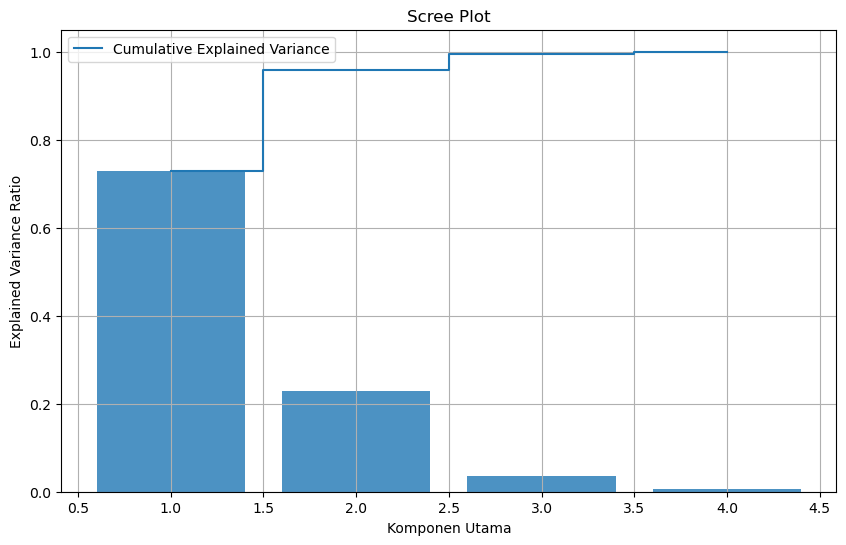

In [6]:
# 3.4 Menghitung explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
print("Explained variance ratio:\n", explained_variance_ratio)

# Visualisasi explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8)
plt.step(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), where='mid', label='Cumulative Explained Variance')
plt.xlabel('Komponen Utama')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# 3.5 Proyeksi data ke ruang 2 dimensi
# Mengambil 2 eigenvector pertama (dengan eigenvalue terbesar)
W = eigenvectors[:, :2]

# Proyeksi data ke ruang 2 dimensi
X_pca = X_scaled.dot(W)

# Menampilkan hasil proyeksi
print("Dimensi data setelah proyeksi PCA:", X_pca.shape)
print("\nHasil proyeksi PCA (5 data pertama):\n", X_pca[:5])

Dimensi data setelah proyeksi PCA: (150, 2)

Hasil proyeksi PCA (5 data pertama):
 [[-2.26470281 -0.4800266 ]
 [-2.08096115  0.67413356]
 [-2.36422905  0.34190802]
 [-2.29938422  0.59739451]
 [-2.38984217 -0.64683538]]


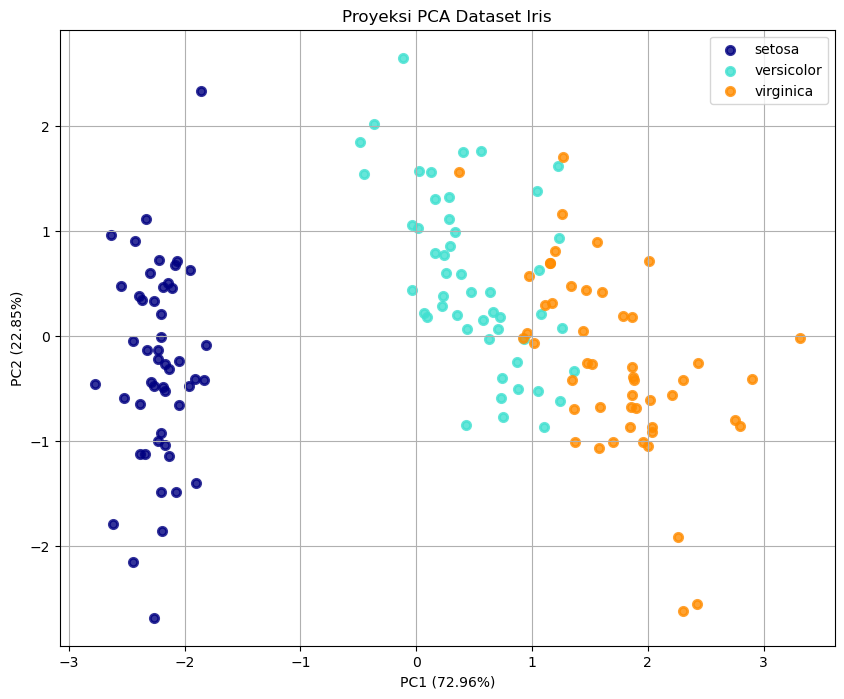

In [8]:
# Visualisasi hasil proyeksi PCA
plt.figure(figsize=(10, 8))
colors = ['navy', 'turquoise', 'darkorange']
target_names = iris.target_names

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=0.8, lw=2, label=target_name)

plt.xlabel('PC1 ({}%)'.format(round(explained_variance_ratio[0] * 100, 2)))
plt.ylabel('PC2 ({}%)'.format(round(explained_variance_ratio[1] * 100, 2)))
plt.title('Proyeksi PCA Dataset Iris')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### 4. Implementasi MDS

In [9]:
# 4.1 Menghitung jarak Euclidean antar pasangan data
from scipy.spatial.distance import pdist, squareform

# Menghitung jarak Euclidean
dist = pdist(X_scaled, metric='euclidean')
# Mengubah ke bentuk matriks
dist_matrix = squareform(dist)

print("Dimensi matriks jarak:", dist_matrix.shape)
print("\nMatriks jarak (5x5 pertama):\n", dist_matrix[:5, :5])

Dimensi matriks jarak: (150, 150)

Matriks jarak (5x5 pertama):
 [[0.         1.17621868 0.84560741 1.10368502 0.26013882]
 [1.17621868 0.         0.52337301 0.43399991 1.3864853 ]
 [0.84560741 0.52337301 0.         0.28389113 0.99157157]
 [1.10368502 0.43399991 0.28389113 0.         1.25016028]
 [0.26013882 1.3864853  0.99157157 1.25016028 0.        ]]


In [10]:
# 4.2 Implementasi algoritma klasik MDS

# Menghitung matriks kuadrat jarak
D_squared = dist_matrix ** 2

# Menghitung matriks double centering
n = D_squared.shape[0]
J = np.eye(n) - (1/n) * np.ones((n, n))
B = -0.5 * J.dot(D_squared).dot(J)

# Menghitung eigenvalue dan eigenvector dari matriks B
eigenvalues_B, eigenvectors_B = np.linalg.eigh(B)

# Mengurutkan eigenvalue dan eigenvector berdasarkan eigenvalue terbesar
idx = eigenvalues_B.argsort()[::-1]
eigenvalues_B = eigenvalues_B[idx]
eigenvectors_B = eigenvectors_B[:, idx]

# Mengambil 2 eigenvalue dan eigenvector terbesar
eigenvalues_B_positive = np.maximum(eigenvalues_B[:2], 0)
eigenvectors_B_2d = eigenvectors_B[:, :2]

# Proyeksi data ke ruang 2 dimensi
X_mds = eigenvectors_B_2d.dot(np.diag(np.sqrt(eigenvalues_B_positive)))

print("Dimensi data setelah proyeksi MDS:", X_mds.shape)
print("\nHasil proyeksi MDS (5 data pertama):\n", X_mds[:5])

Dimensi data setelah proyeksi MDS: (150, 2)

Hasil proyeksi MDS (5 data pertama):
 [[-2.26470281 -0.4800266 ]
 [-2.08096115  0.67413356]
 [-2.36422905  0.34190802]
 [-2.29938422  0.59739451]
 [-2.38984217 -0.64683538]]


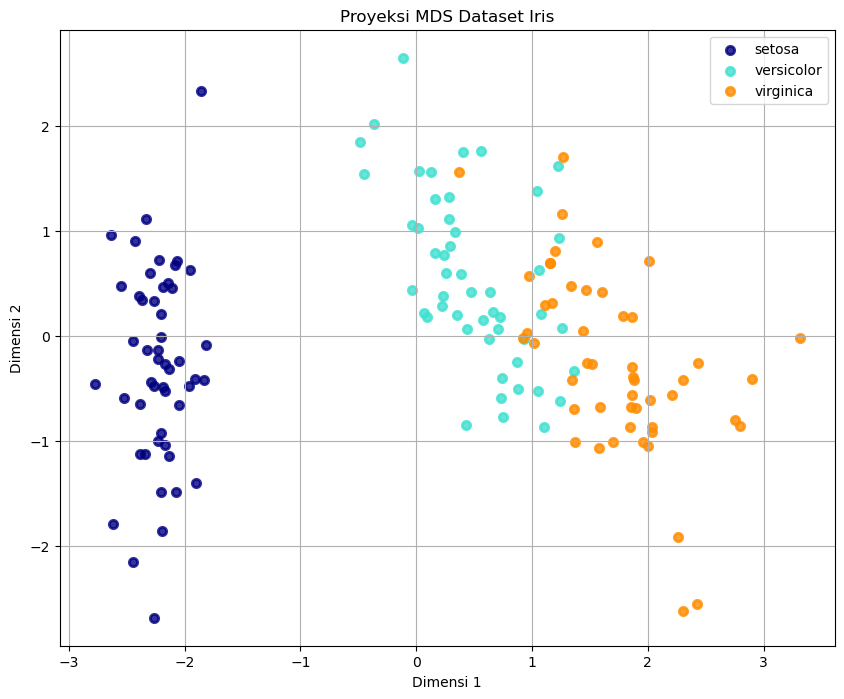

In [11]:
# Visualisasi hasil proyeksi MDS
plt.figure(figsize=(10, 8))
colors = ['navy', 'turquoise', 'darkorange']
target_names = iris.target_names

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_mds[y == i, 0], X_mds[y == i, 1], color=color, alpha=0.8, lw=2, label=target_name)

plt.xlabel('Dimensi 1')
plt.ylabel('Dimensi 2')
plt.title('Proyeksi MDS Dataset Iris')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### 5. Perbandingan Hasil Proyeksi PCA dan MDS

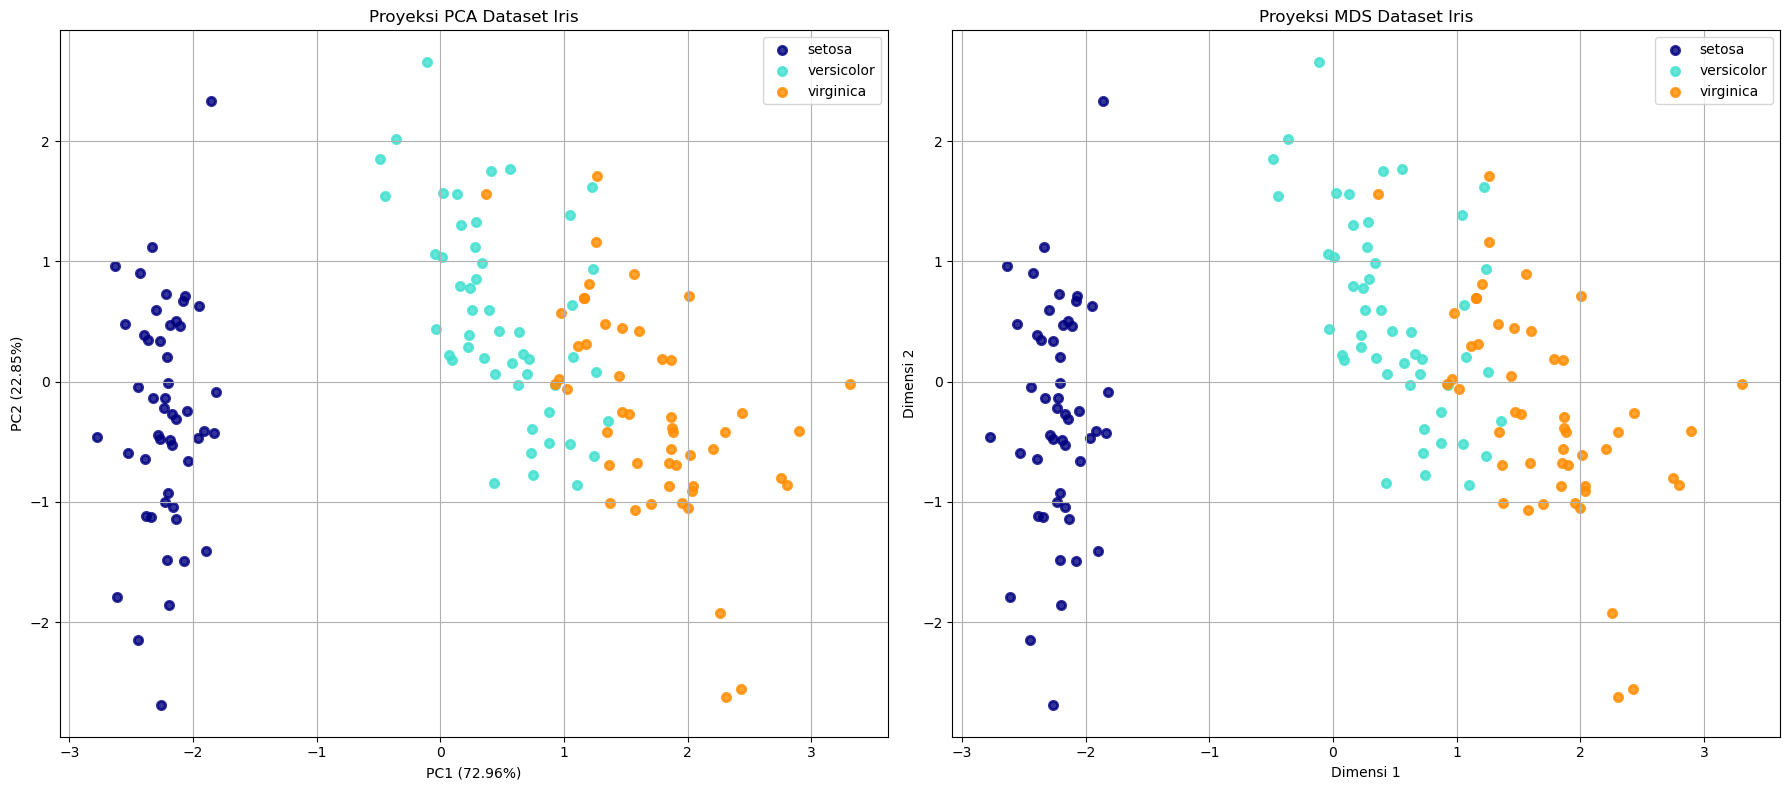

In [12]:
# Visualisasi perbandingan PCA dan MDS
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
colors = ['navy', 'turquoise', 'darkorange']
target_names = iris.target_names

# Plot PCA
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    ax1.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=0.8, lw=2, label=target_name)
ax1.set_xlabel('PC1 ({}%)'.format(round(explained_variance_ratio[0] * 100, 2)))
ax1.set_ylabel('PC2 ({}%)'.format(round(explained_variance_ratio[1] * 100, 2)))
ax1.set_title('Proyeksi PCA Dataset Iris')
ax1.legend(loc='best')
ax1.grid(True)

# Plot MDS
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    ax2.scatter(X_mds[y == i, 0], X_mds[y == i, 1], color=color, alpha=0.8, lw=2, label=target_name)
ax2.set_xlabel('Dimensi 1')
ax2.set_ylabel('Dimensi 2')
ax2.set_title('Proyeksi MDS Dataset Iris')
ax2.legend(loc='best')
ax2.grid(True)

plt.tight_layout()
plt.show()

### 6. Analisis Perbandingan Hasil Proyeksi

#### 6.1 Keterpisahan antar kelas

Dari visualisasi hasil proyeksi PCA dan MDS, dapat dilihat bahwa:
- Kedua metode berhasil memisahkan kelas setosa dari kelas lainnya dengan baik
- Kelas versicolor dan virginica masih sedikit tumpang tindih pada kedua metode
- PCA cenderung memberikan pemisahan yang lebih jelas antara kelas versicolor dan virginica dibandingkan MDS

#### 6.2 Interpretasi dimensi hasil reduksi

- PCA: Dimensi hasil reduksi dapat diinterpretasikan berdasarkan kontribusi fitur asli. PC1 menjelaskan sekitar 72% variasi data, sedangkan PC2 menjelaskan sekitar 23% variasi data.
- MDS: Dimensi hasil reduksi MDS lebih sulit diinterpretasikan karena MDS fokus pada mempertahankan jarak antar data, bukan pada variasi data.

#### 6.3 Keunggulan dan keterbatasan masing-masing metode

**PCA:**
- Keunggulan: Komputasi lebih efisien, dapat menjelaskan variasi data melalui explained variance ratio, dan dimensi hasil reduksi dapat diinterpretasikan.
- Keterbatasan: Hanya mempertahankan variasi data, tidak menjamin mempertahankan struktur jarak antar data. Asumsi linearitas.

**MDS:**
- Keunggulan: Fokus pada mempertahankan jarak antar data, sehingga lebih baik dalam mempertahankan struktur data. Dapat menangani data non-linear.
- Keterbatasan: Komputasi lebih mahal terutama untuk dataset besar, dan dimensi hasil reduksi sulit diinterpretasikan.